<h3>Exploring the NZV, Normalization, Outlier Removal</h3>

In [1]:
# importing dataset and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import normalize
from sklearn.feature_selection import VarianceThreshold

diabetes = pd.read_csv ("diabetes_clean.csv")

In [2]:
print(diabetes.shape)
print(diabetes.describe(include='all'))

(253680, 22)
       Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.157588       0.429001       0.424121       0.962670   
std           0.364355       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0

In [3]:
# Near-zero variance

tr= VarianceThreshold(threshold=0.1)

tr.fit(diabetes) # applying threshold

feature_nzv=tr.get_support(indices=True) #getting indices with no nzv features
data_nzv=diabetes.columns[feature_nzv] # getting column names.
data_p_nzv=diabetes[data_nzv] # filtered data.

data_p_nzv.shape



(253680, 16)

In [4]:
# what variables have been dropped.
diabetes.columns.drop(data_nzv)

Index(['CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost'],
      dtype='object')

Removed variables:
- CholCheck
- Stroke
- HeartDiseaseorAttack
- HvyAlcholConsump
- AnyHealthcare
- NoDocbcCost

the dataset after the removel is data_p_nzv referring to data past nzv.

<h3>Removing outliers for BMI, PhysHlth and MentHlth</h3>

<Axes: >

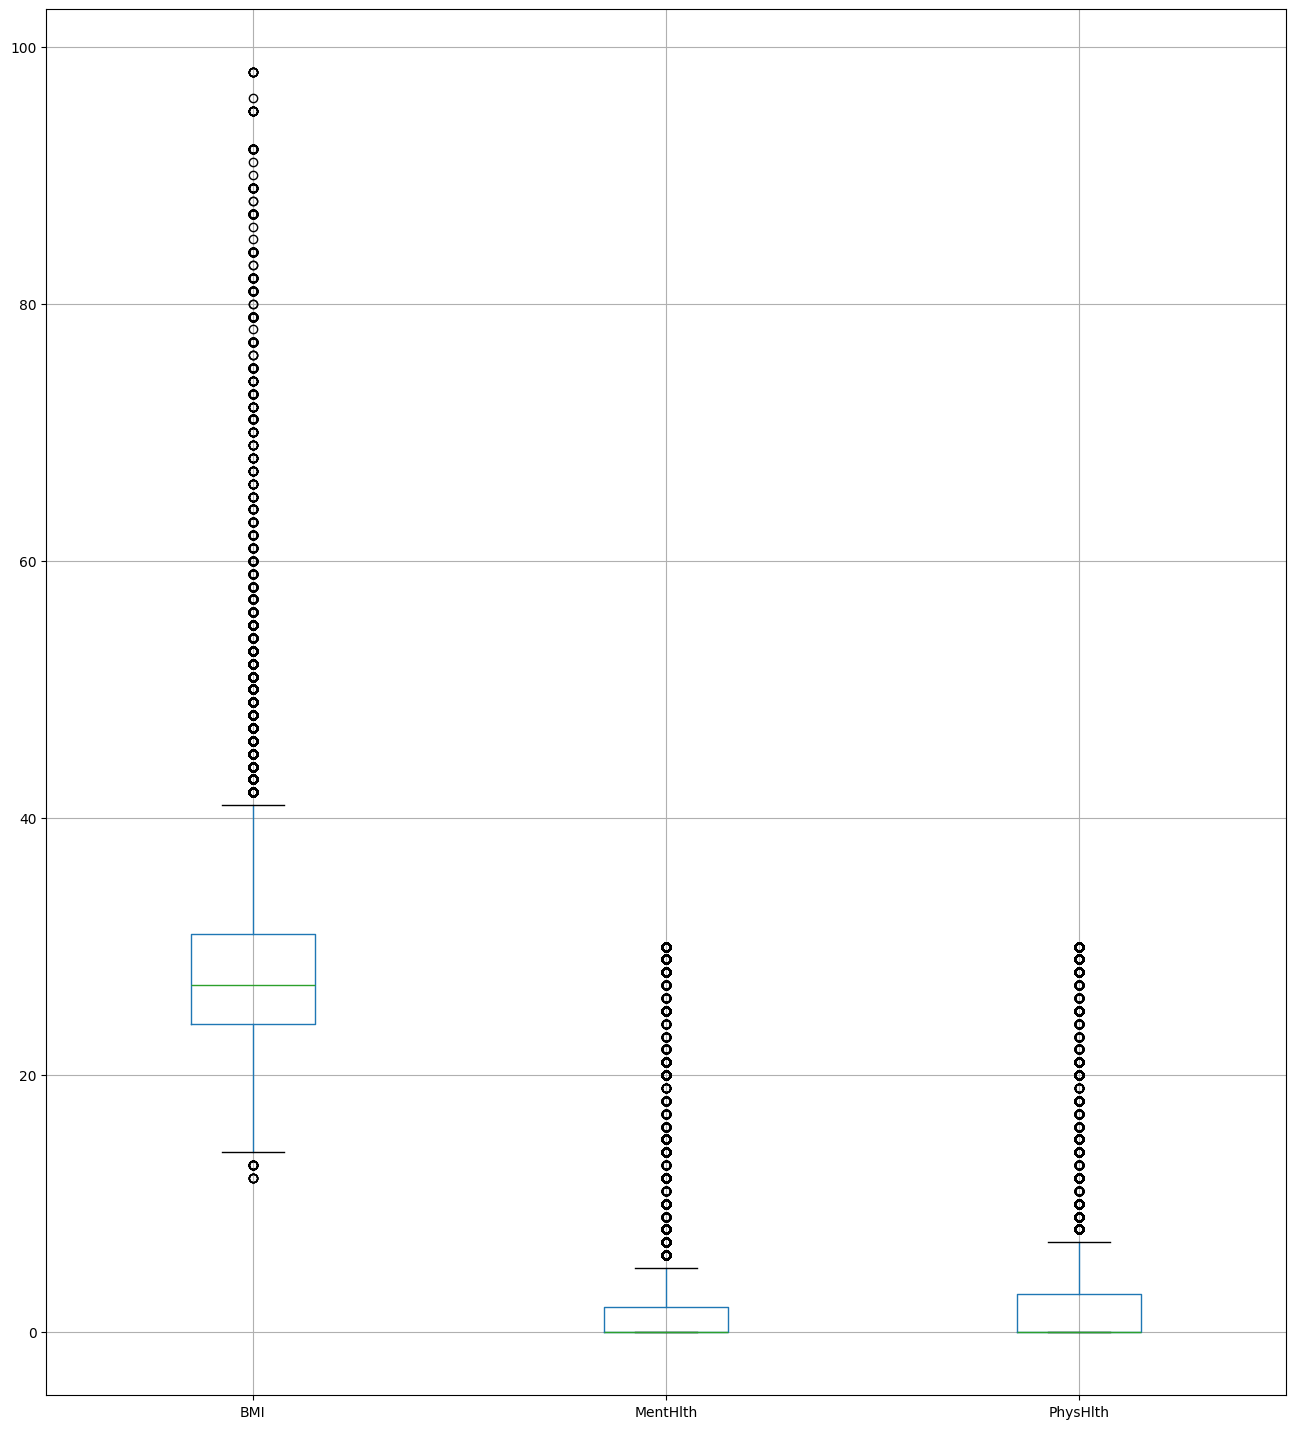

In [5]:
plt.figure(figsize=(16, 18))
diabetes[['BMI','MentHlth','PhysHlth']].boxplot()

In [6]:
# Defining variables
bmi_col = diabetes['BMI'].copy()
ph_col = diabetes['PhysHlth'].copy()
mh_col = diabetes['MentHlth'].copy()

<Axes: >

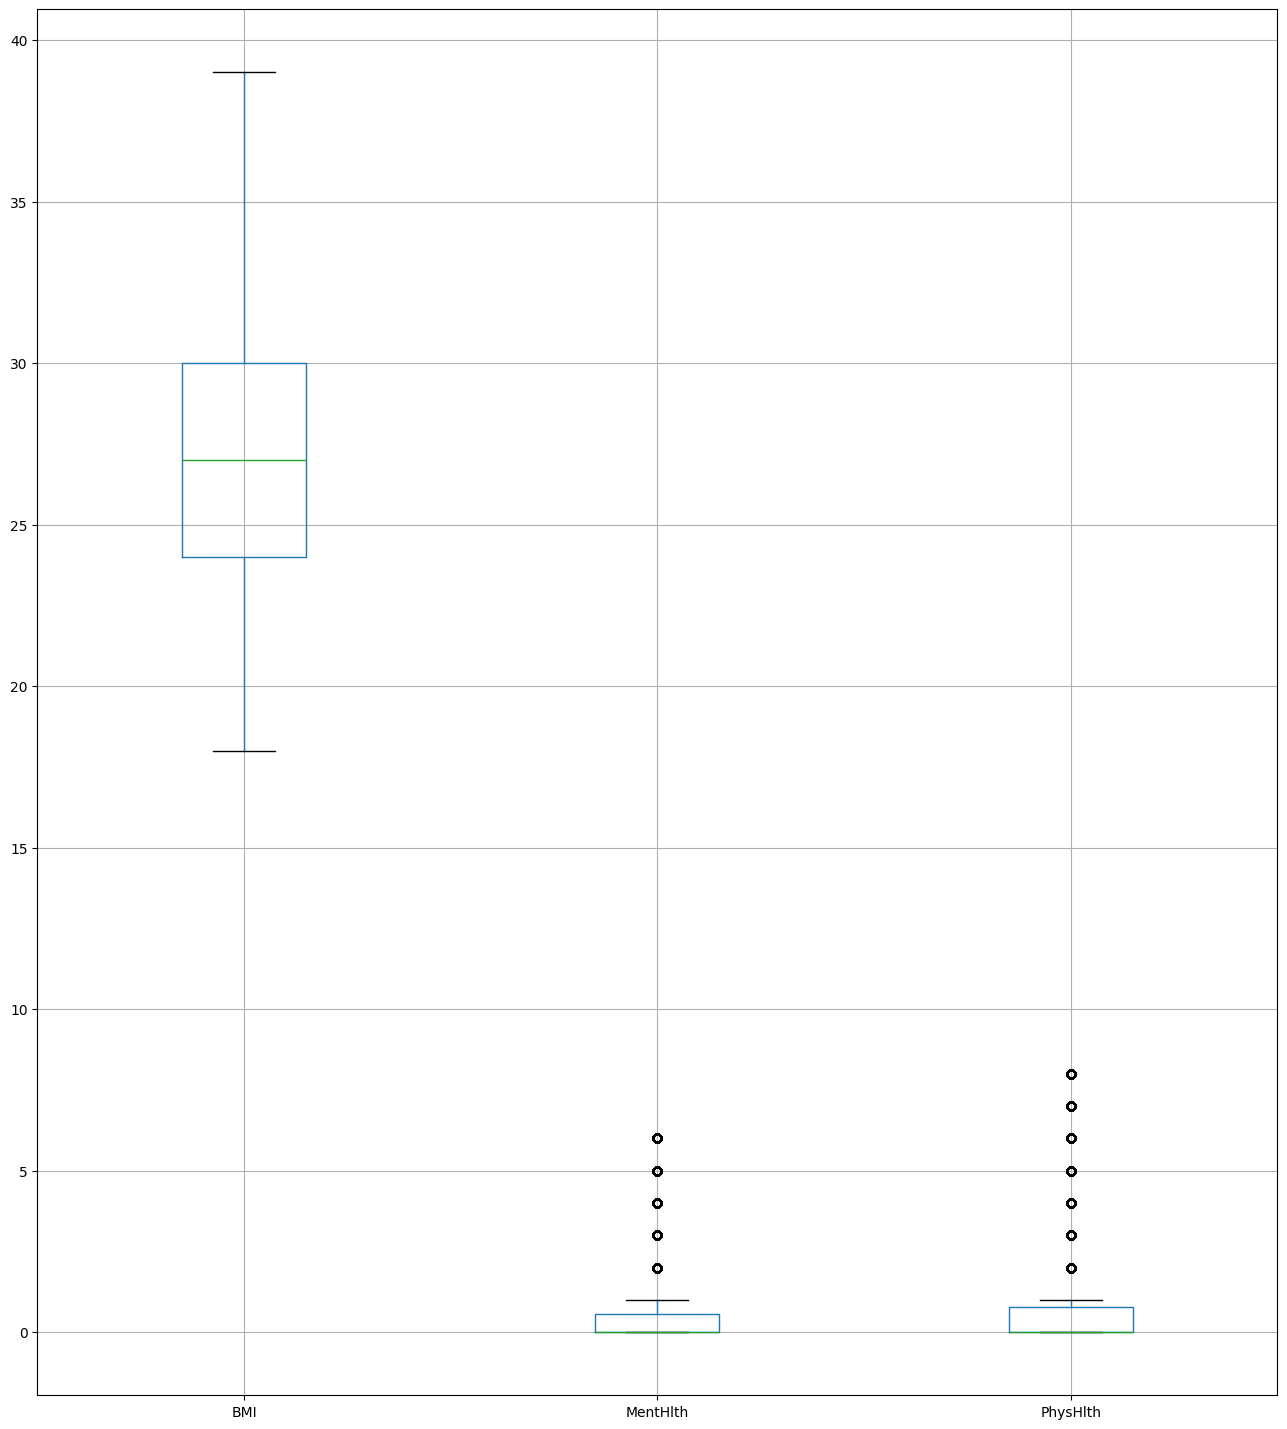

In [7]:
# Obtaining outlier tresholds.
mean_bmi=np.mean(bmi_col)
std_bmi=np.std(bmi_col)
tr_bmi=1.7*std_bmi

mean_ph= np.mean(ph_col)
std_ph=np.std(ph_col)
tr_ph= 0.5*std_ph

mean_mh= np.mean(mh_col)
std_mh=np.std(mh_col)
tr_mh= 0.5*std_mh

# Identifying outliers

data_p_ol=diabetes.copy()
data_p_ol.loc[:,'BMI'] = bmi_col[np.abs(bmi_col - mean_bmi) <= tr_bmi]
data_p_ol.loc[:,'PhysHlth'] = ph_col[np.abs(ph_col - mean_ph) <= tr_ph]
data_p_ol.loc[:,'MentHlth'] = mh_col[np.abs(mh_col - mean_mh) <= tr_mh]



# Filling any introduced NaN values
mean_bmi_u=np.nanmean(data_p_ol['BMI'])
mean_ph_u=np.nanmean(data_p_ol['PhysHlth'])
mean_mh_u=np.nanmean(data_p_ol['MentHlth'])

data_p_ol['BMI'].fillna(mean_bmi_u, inplace=True)
data_p_ol['PhysHlth'].fillna(mean_ph_u, inplace=True)
data_p_ol['MentHlth'].fillna(mean_mh_u, inplace=True)

# Checking variables after outlier removal

plt.figure(figsize=(16, 18))
data_p_ol[['BMI','MentHlth','PhysHlth']].boxplot()


BMI Outliers have been fixed, but MentHlth and PhysHlth outliers left will stay, otherwise, the variables do not seem to have almost any variance.

The data with fixed outliers is saved in data_p_ol referring to data past outliers.

<h3> Normalizing BMI Variable </h3>

In [8]:
# Normalizing BMI variable without outlier fix

bmi_c=data_p_nzv['BMI']
norm_bmi= normalize(bmi_c.values.reshape(1,-1)) # column into 2D array. -1 calculates the number of columns based on the original array.

# Changing BMI column into normalized values

data_p_nzv.loc[:,'BMI']= norm_bmi[0] # replace with first row of 2D array.

# Normalizing BMI variable with outlier fix

bmi_c_ol=data_p_ol['BMI']
norm_bmi_ol= normalize(bmi_c_ol.values.reshape(1,-1)) 

# changing BMI column into normalized values

data_p_ol.loc[:,'BMI']= norm_bmi_ol[0] # replace with first row of 2D array.


<h3> Correlation Assesment </h3>

From EDA the correlation of variables which could be removed to reduce redundancy were:

DiffWalk & GenHlth at 0.46,
PhysHlth & GenHlth at 0.52,
DiffWalk & PhysHlth at 0.48,
Income and Education at 0.45.

Below the effects of removing these variables are assesed.


<Axes: title={'center': 'Data Without NZV, PhysHlth, DiffWalk, Income'}>

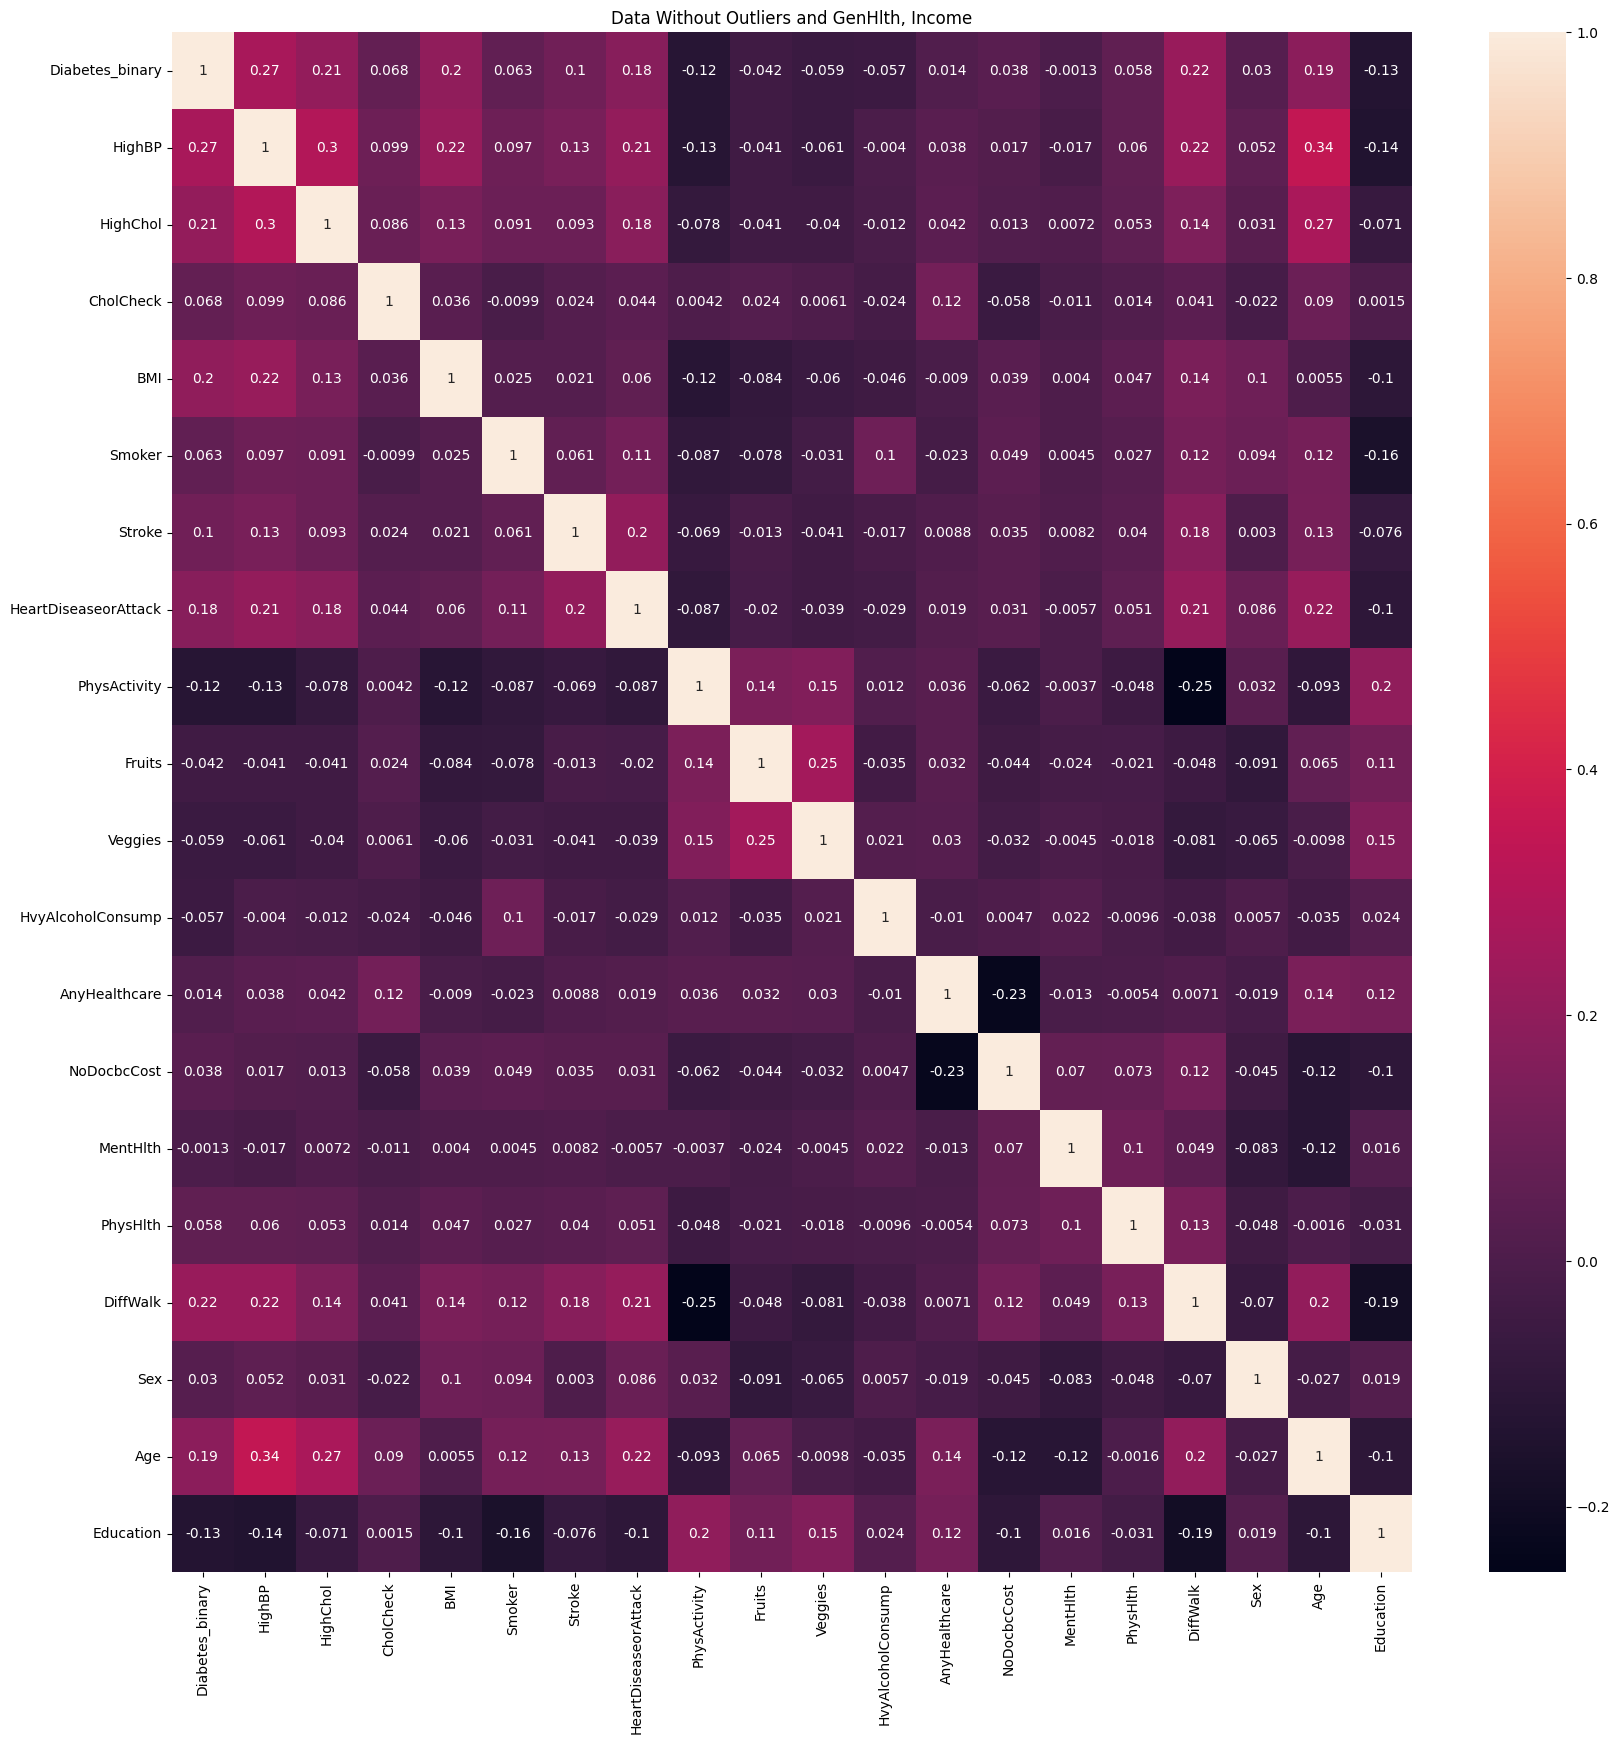

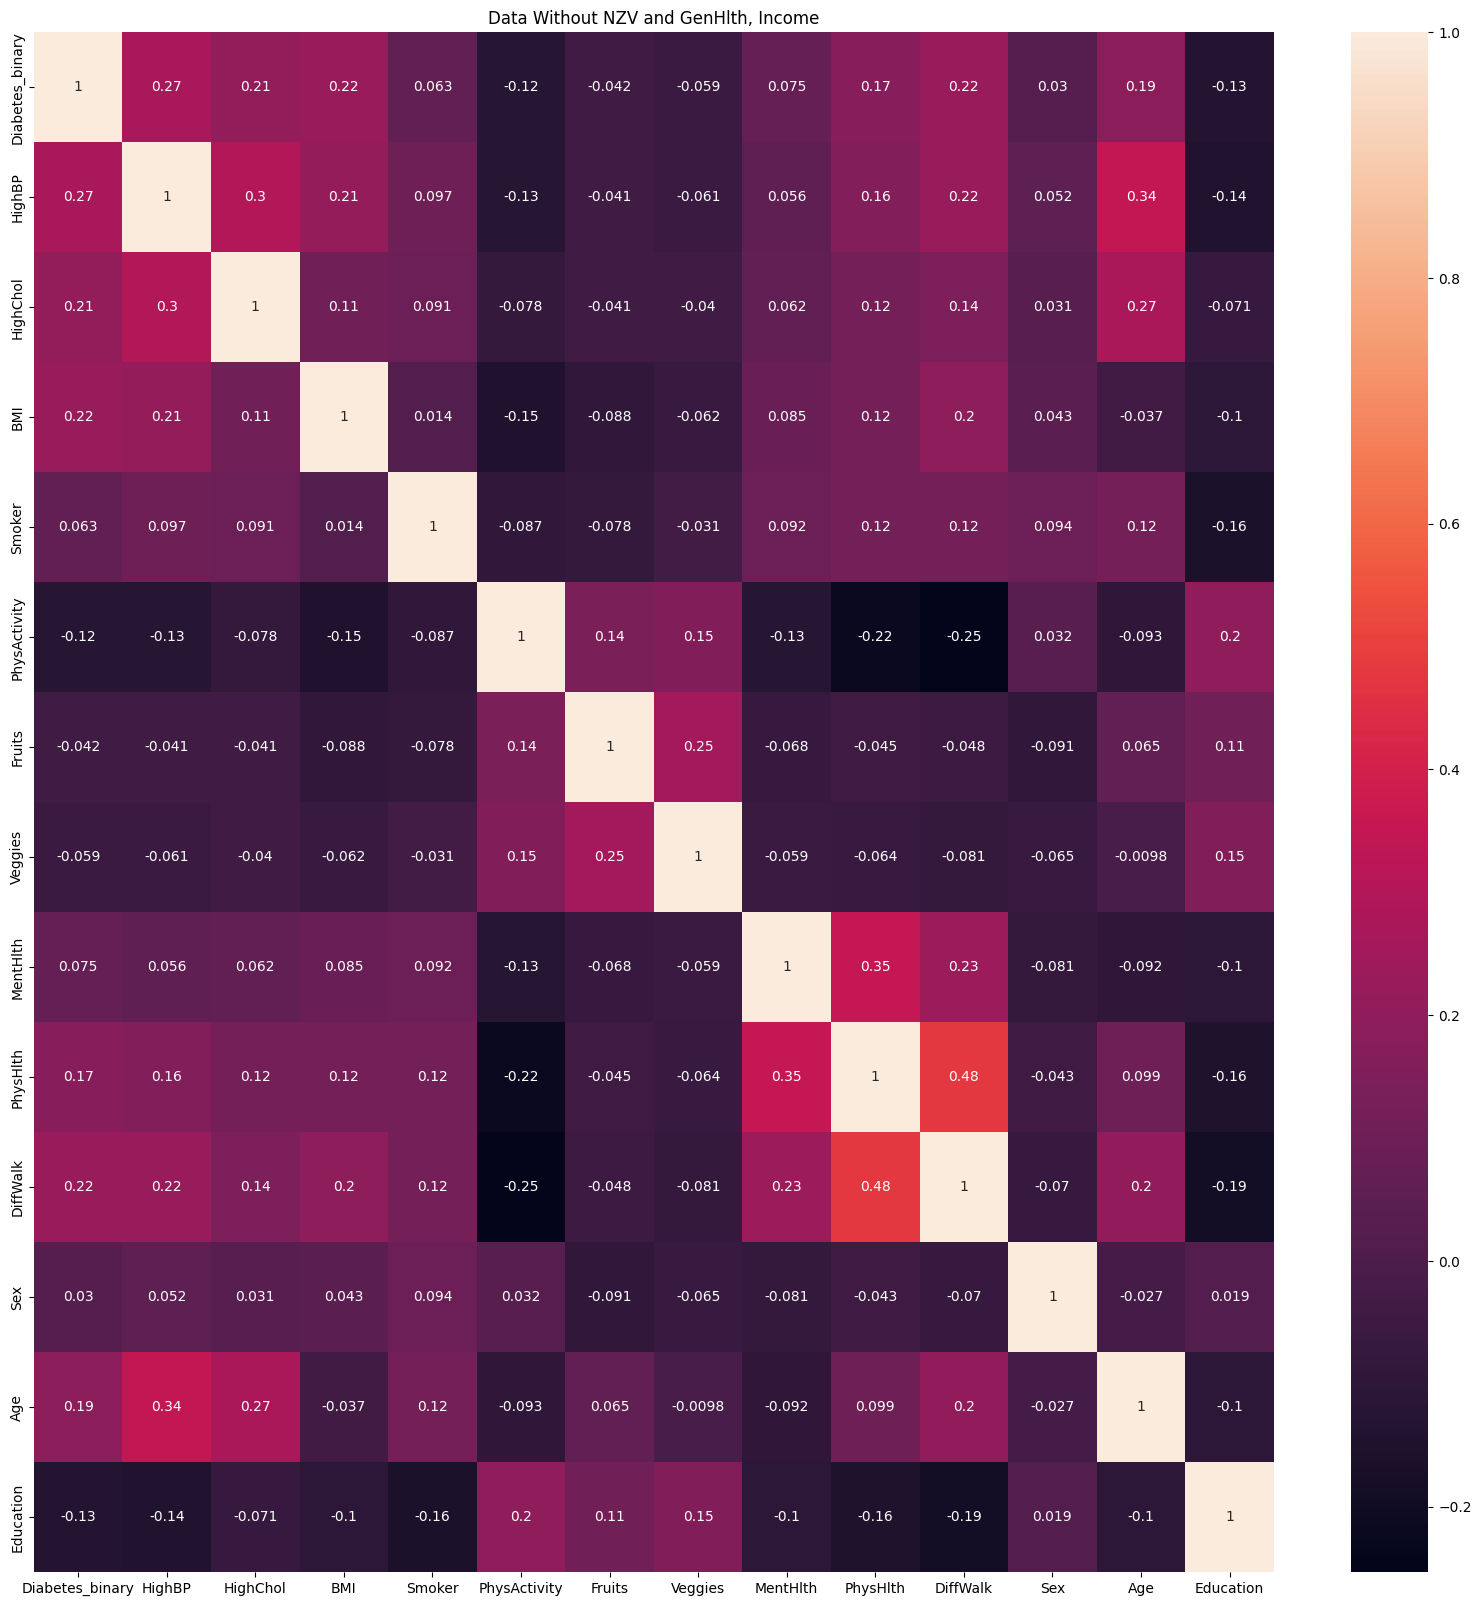

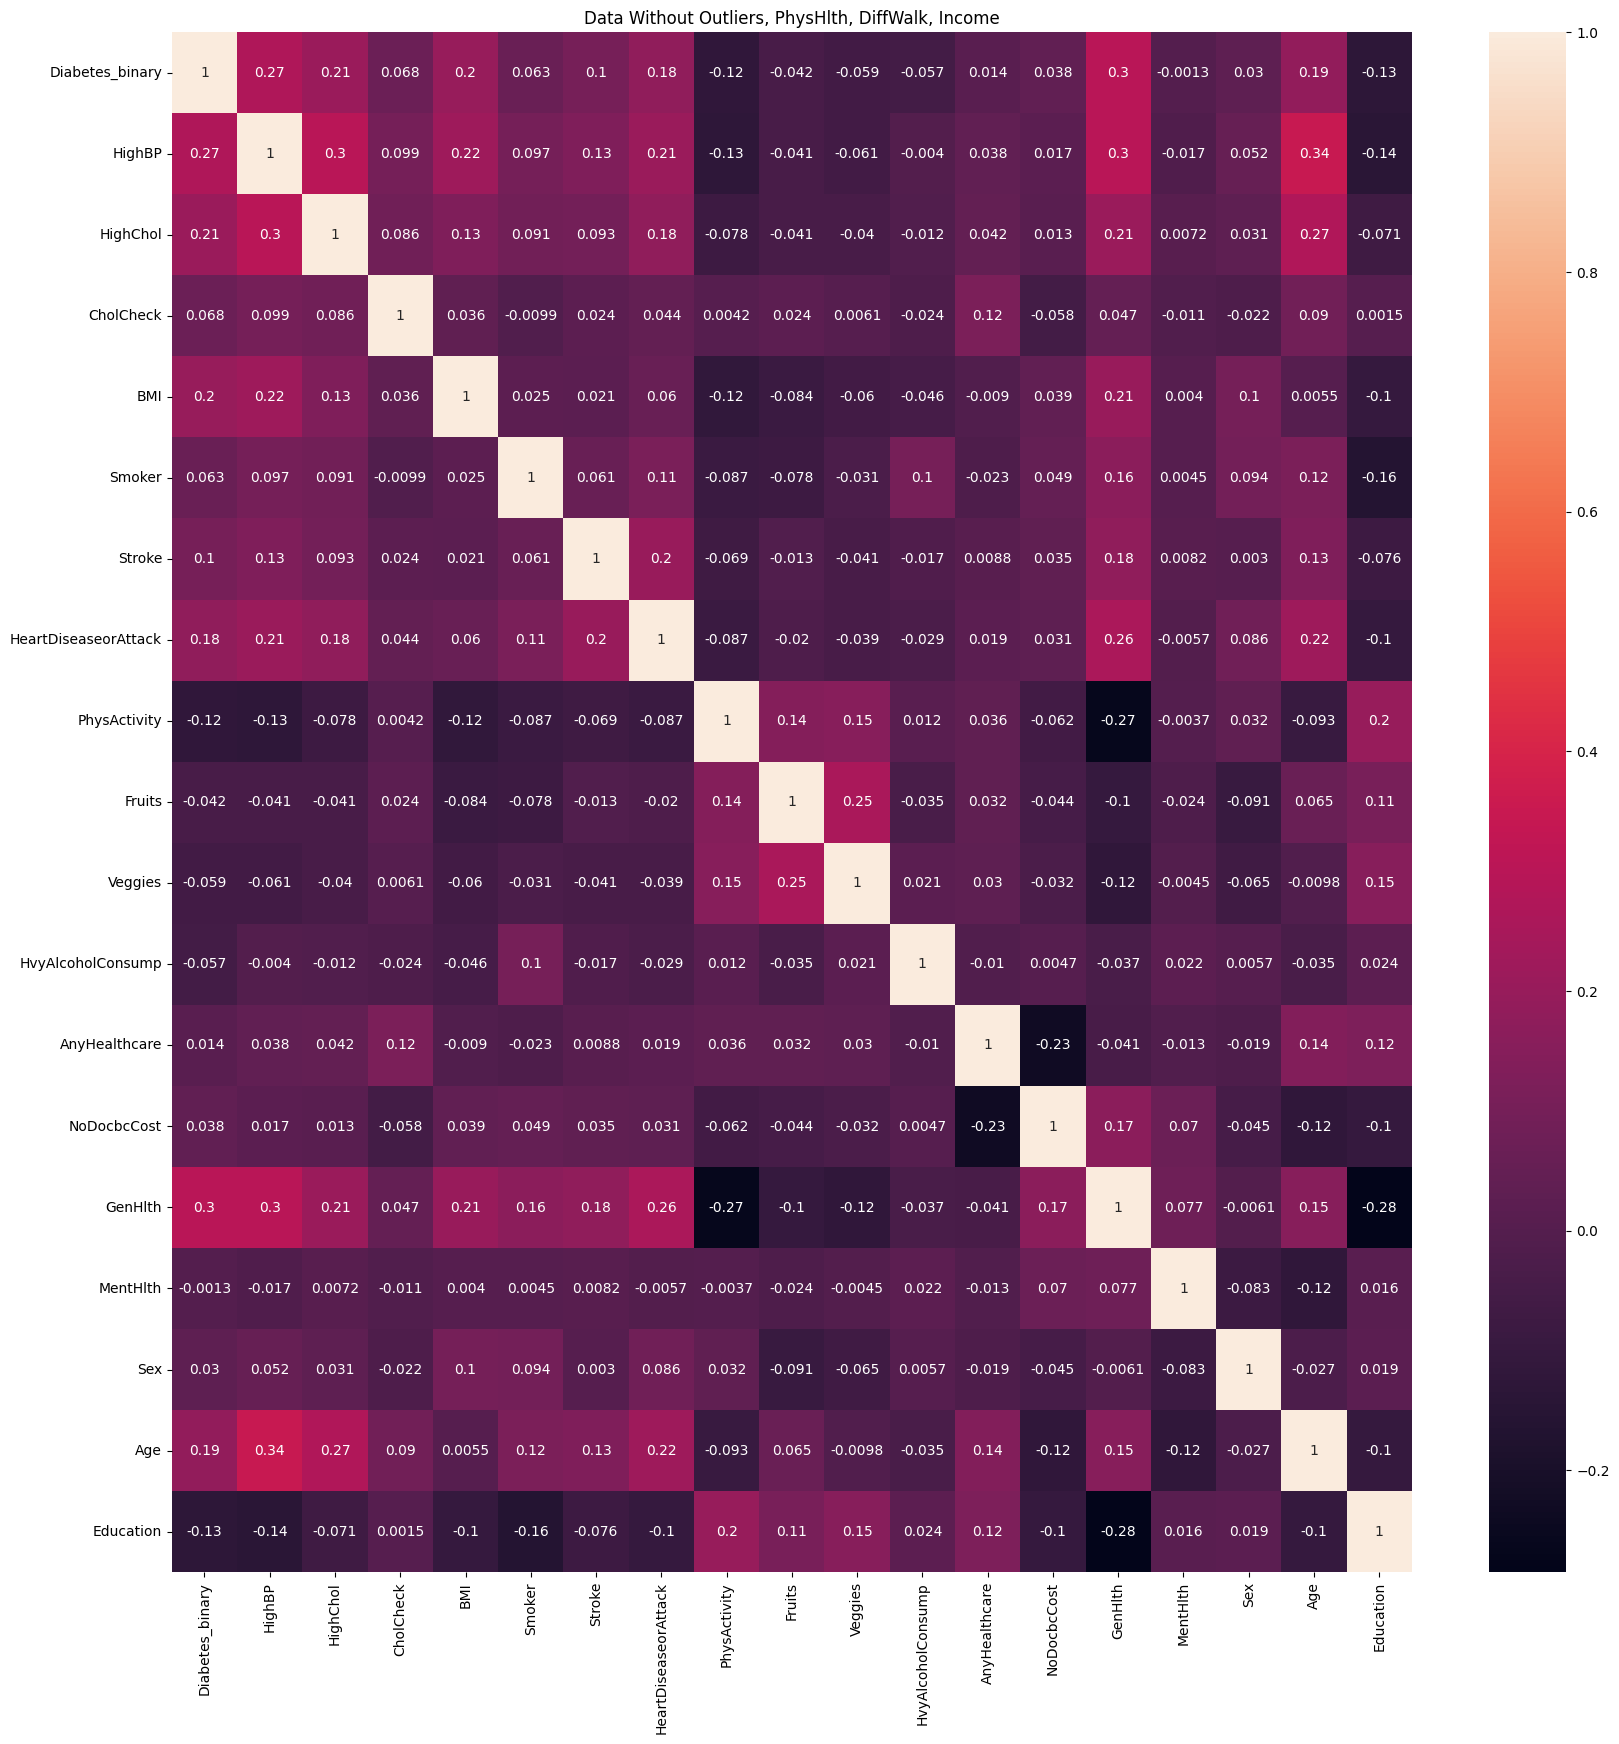

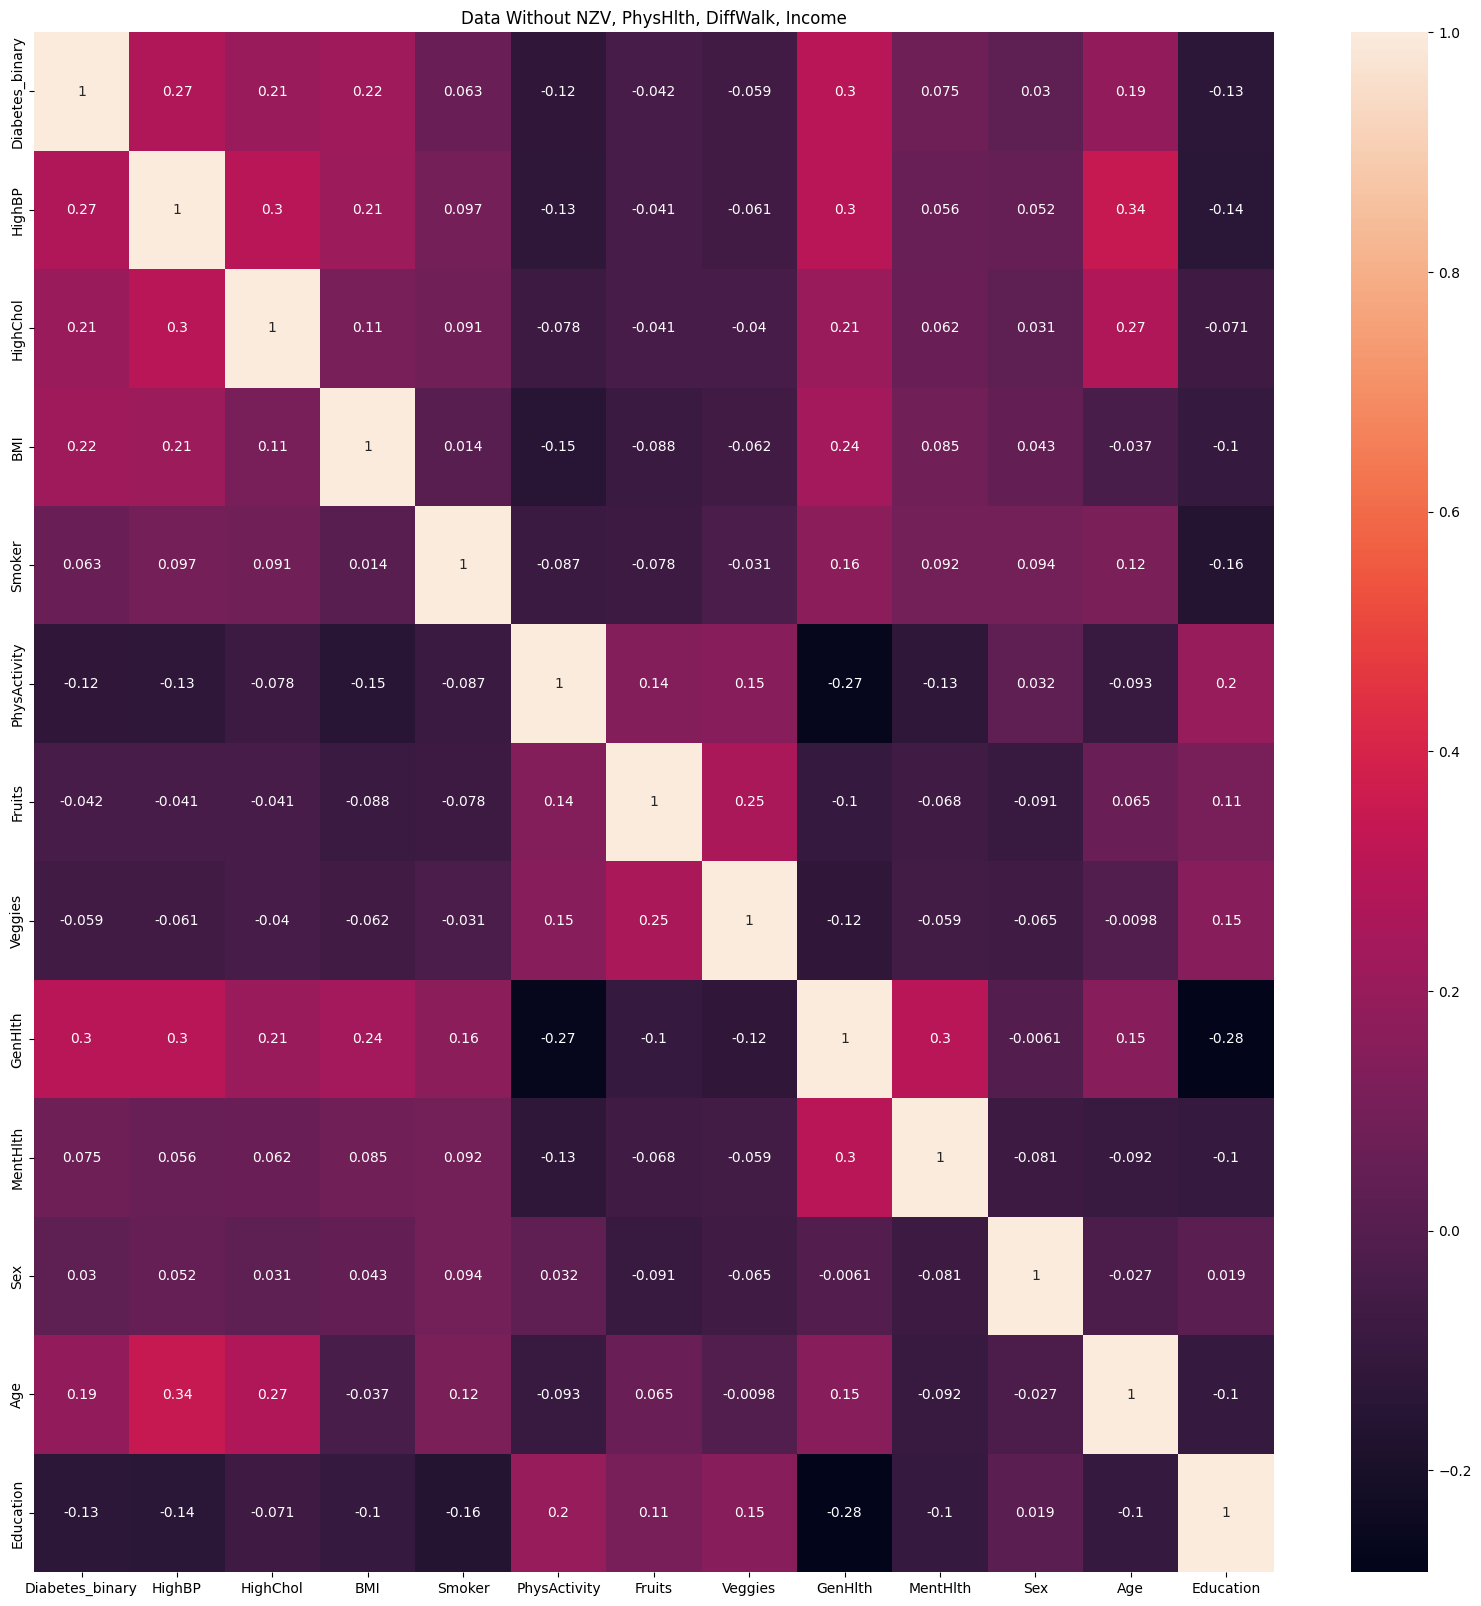

In [9]:
# creating dataset without outliers and without GenHlth, Income features.
data_p_ol_genhlth = data_p_ol.copy()
data_p_ol_genhlth = data_p_ol_genhlth.drop(columns=['GenHlth', 'Income'])

plt.figure(figsize=(20,20))
plt.title("Data Without Outliers and GenHlth, Income")
sns.heatmap(data_p_ol_genhlth.corr(), annot=True)

# creating dataset without nzv and GenHlth, Income features.
data_p_nzv_genhlth = data_p_nzv.copy()
data_p_nzv_genhlth =data_p_nzv_genhlth.drop(columns=['GenHlth','Income'])

plt.figure(figsize=(20,20))
plt.title("Data Without NZV and GenHlth, Income")
sns.heatmap(data_p_nzv_genhlth.corr(), annot=True)

# creating dataset without outliers and without PhysHlth, DiffWalk, Income features.
data_min_diffwalk_phys_ol = data_p_ol.copy()
data_min_diffwalk_phys_ol = data_min_diffwalk_phys_ol.drop(columns=['PhysHlth','DiffWalk','Income'])

plt.figure(figsize=(20,20))
plt.title("Data Without Outliers, PhysHlth, DiffWalk, Income")
sns.heatmap(data_min_diffwalk_phys_ol.corr(), annot=True)

# creating dataset without nzv and PhysHlth, DiffWalk, Income features.
data_min_diffwalk_phys_nzv = data_p_nzv.copy()
data_min_diffwalk_phys_nzv =data_min_diffwalk_phys_nzv.drop(columns=['PhysHlth','DiffWalk','Income'])

plt.figure(figsize=(20,20))
plt.title("Data Without NZV, PhysHlth, DiffWalk, Income")
sns.heatmap(data_min_diffwalk_phys_nzv.corr(), annot=True)




The datasets collected from the above and the feature engineering applied are as follows:

- data_p_nzv: nzv feature removal, normalization.
- data_p_ol: normalization, outlier removal.
- data_p_ol_genhlth: normalization, outlier removal, genhlth and income variable removal.
- data_p_nzv_genhlth: nzv feature removal, normalization, genhlth and income variable removal.
- data_min_diffwalk_phys_nzv: nzv feature removal, normalization, physhlth,  diffvalk, income variables removed.
- data_min_diffwalk_phys_ol: normalization, outlier removal, physhlth, diffvalk, income variables removed.

<h3>Testing different dataset performance</h3>

Seven datasets are present, including the original diabetes set. They will all be split and tested for performance on basic decision trees.

In [10]:
# importing libraries

from sklearn import tree # trees modelling
from sklearn.model_selection import train_test_split # data splitting

In [11]:
# splitting data

# first dataset: original

Ivs1 = diabetes.drop('Diabetes_binary', axis='columns')
DV1 = diabetes['Diabetes_binary']

train_Ivs1, test_Ivs1, train_DV1, test_DV1 = train_test_split(Ivs1,DV1,test_size=0.3,random_state=51)

# second dataset: nzv
Ivs2 = data_p_nzv.drop('Diabetes_binary', axis='columns')
DV2 = data_p_nzv['Diabetes_binary']

train_Ivs2, test_Ivs2, train_DV2, test_DV2 = train_test_split(Ivs2,DV2,test_size=0.3,random_state=51)

# third dataset: outliers
Ivs3 = data_p_ol.drop('Diabetes_binary', axis='columns')
DV3 = data_p_ol['Diabetes_binary']

train_Ivs3, test_Ivs3, train_DV3, test_DV3 = train_test_split(Ivs3,DV3,test_size=0.3,random_state=51)

# fourth dataset: nzv and genhlth,income
Ivs4 = data_p_nzv_genhlth.drop('Diabetes_binary', axis='columns')
DV4 = data_p_nzv_genhlth['Diabetes_binary']

train_Ivs4, test_Ivs4, train_DV4, test_DV4 = train_test_split(Ivs4,DV4,test_size=0.3,random_state=51)

# fifth dataset: outliers and genhlth, income
Ivs5 = data_p_ol_genhlth.drop('Diabetes_binary', axis='columns')
DV5 = data_p_ol_genhlth['Diabetes_binary']

train_Ivs5, test_Ivs5, train_DV5, test_DV5 = train_test_split(Ivs5,DV5,test_size=0.3,random_state=51)

# sixth dataset: nzv, physhlth, diffwalk, income
Ivs6 = data_min_diffwalk_phys_nzv.drop('Diabetes_binary', axis='columns')
DV6 = data_min_diffwalk_phys_nzv['Diabetes_binary']

train_Ivs6, test_Ivs6, train_DV6, test_DV6 = train_test_split(Ivs6,DV6,test_size=0.3,random_state=51)

# seventh dataset: outliers, physhlth, diffwalk, income
Ivs7 = data_min_diffwalk_phys_ol.drop('Diabetes_binary', axis='columns')
DV7 = data_min_diffwalk_phys_ol['Diabetes_binary']

train_Ivs7, test_Ivs7, train_DV7, test_DV7 = train_test_split(Ivs7,DV7,test_size=0.3,random_state=51)

In [12]:
# setting up initial models

model1 = tree.DecisionTreeClassifier()
fitoriginal=model1.fit(train_Ivs1, train_DV1)

model2 = tree.DecisionTreeClassifier()
fitnzv=model2.fit(train_Ivs2, train_DV2)

model3 = tree.DecisionTreeClassifier()
fitol=model3.fit(train_Ivs3, train_DV3)

model4 = tree.DecisionTreeClassifier()
fitnzvgenhlth=model4.fit(train_Ivs4, train_DV4)

model5 = tree.DecisionTreeClassifier()
fitolgenhlth=model5.fit(train_Ivs5, train_DV5)

model6 = tree.DecisionTreeClassifier()
fitnzvphdiff=model6.fit(train_Ivs6, train_DV6)

model7 = tree.DecisionTreeClassifier()
fitolphdiff=model7.fit(train_Ivs7, train_DV7)


In [13]:
# evaluating performance scores
acc1=model1.score(test_Ivs1,test_DV1)
acc2=model2.score(test_Ivs2,test_DV2)
acc3=model3.score(test_Ivs3,test_DV3)
acc4=model4.score(test_Ivs4,test_DV4)
acc5=model5.score(test_Ivs5,test_DV5)
acc6=model6.score(test_Ivs6,test_DV6)
acc7=model7.score(test_Ivs7,test_DV7)

print('model1:{}'.format(round(acc1,3)))
print('model2:{}'.format(round(acc2,3)))
print('model3:{}'.format(round(acc3,3)))
print('model4:{}'.format(round(acc4,3)))
print('model5:{}'.format(round(acc5,3)))
print('model6:{}'.format(round(acc6,3)))
print('model7:{}'.format(round(acc7,3)))

model1:0.781
model2:0.779
model3:0.778
model4:0.787
model5:0.787
model6:0.792
model7:0.788


The datasets performed in a similar fashion. The original dataset seems to perform in the top category with ~78% accuracy. The deletion of features does not provide any assistance in modelling, neither does outlier removal. Model 6 however with DiffWalk, PhysHlth, Income and near-zero-values removed performed at ~79% accuracy, which is not a big difference, but should be evaluated for further modelling and feature selection.

Four ways of investigating important features will be:

- using decision trees to see which features are deemed important.
- using random forest to evaluate whether important features tend to be the same.

In [14]:
#setting up initial model

model1 = tree.DecisionTreeClassifier()
model6 = tree.DecisionTreeClassifier()
classtree_noprune=model1.fit(train_Ivs1, train_DV1)
classtree_noprune6=model6.fit(train_Ivs6,train_DV6)

In [15]:
# for original dataset

optalpha = classtree_noprune.cost_complexity_pruning_path(train_Ivs1,train_DV1) #finding optimal pruning parameter alpha.
biggest=max(optalpha.ccp_alphas) # extracting highest alpha
medianalpha=np.median(optalpha.ccp_alphas) # extracting median alpha.
meanalpha=np.mean(optalpha.ccp_alphas) # average alpha

# for preprocessed dataset

optalpha6 = classtree_noprune6.cost_complexity_pruning_path(train_Ivs6,train_DV6) #finding optimal pruning parameter alpha.
biggest6=max(optalpha6.ccp_alphas) # extracting highest alpha
medianalpha6=np.median(optalpha6.ccp_alphas) # extracting median alpha.
meanalpha6=np.mean(optalpha6.ccp_alphas) # average alpha


In [16]:
# specifying additional models with pruning parameters: original dataset
model2 = tree.DecisionTreeClassifier(ccp_alpha=biggest)
model3 = tree.DecisionTreeClassifier(ccp_alpha=medianalpha)
model4 = tree.DecisionTreeClassifier(ccp_alpha=meanalpha)

# specifying additional models with pruning parameters: preprocessed dataset

model26 = tree.DecisionTreeClassifier(ccp_alpha=biggest6)
model36 = tree.DecisionTreeClassifier(ccp_alpha=medianalpha6)
model46 = tree.DecisionTreeClassifier(ccp_alpha=meanalpha6)

In [17]:
# fit: original dataset
classtree2=model2.fit(train_Ivs1, train_DV1)
classtree3=model3.fit(train_Ivs1, train_DV1)
classtree4=model4.fit(train_Ivs1, train_DV1)

# fit: preprocessed dataset
classtree26=model26.fit(train_Ivs6, train_DV6)
classtree36=model36.fit(train_Ivs6, train_DV6)
classtree46=model46.fit(train_Ivs6, train_DV6)


In [18]:
# evaluating depth of each model: original dataset
dep1=classtree_noprune.get_depth()
dep2=classtree2.get_depth()
dep3=classtree3.get_depth()
dep4=classtree4.get_depth()

# evaluating depth of each model: preprocessed dataset
dep16=classtree_noprune6.get_depth()
dep26=classtree26.get_depth()
dep36=classtree36.get_depth()
dep46=classtree46.get_depth()

#evaluating accuracy of each model: original dataset
acc1=model1.score(test_Ivs1,test_DV1)
acc2=model2.score(test_Ivs1,test_DV1)
acc3=model3.score(test_Ivs1,test_DV1)
acc4=model4.score(test_Ivs1,test_DV1)

#evaluating accuracy of each model: preprocessed dataset
acc16=model6.score(test_Ivs6,test_DV6)
acc26=model26.score(test_Ivs6,test_DV6)
acc36=model36.score(test_Ivs6,test_DV6)
acc46=model46.score(test_Ivs6,test_DV6)

print('original dataset')
print('model 1: alpha 0, depth {}, accuracy {}.'.format(dep1,acc1))
print('model 2: alpha {}, depth {}, accuracy {}.'.format(round(biggest,ndigits=2),dep2,acc2))
print('model 3: alpha {}, depth {}, accuracy {}.'.format(round(medianalpha,ndigits=2),dep3,acc3))
print('model 4: alpha {}, depth {}, accuracy {}.'.format(round(meanalpha,ndigits=2),dep4,acc4))

print('preprocessed dataset')
print('model 1: alpha 0, depth {}, accuracy {}.'.format(dep16,acc16))
print('model 26: alpha {}, depth {}, accuracy {}.'.format(round(biggest6,ndigits=2),dep26,acc26))
print('model 36: alpha {}, depth {}, accuracy {}.'.format(round(medianalpha6,ndigits=2),dep36,acc36))
print('model 46: alpha {}, depth {}, accuracy {}.'.format(round(meanalpha6,ndigits=2),dep46,acc46))

original dataset
model 1: alpha 0, depth 41, accuracy 0.7783296541574687.
model 2: alpha 0.02, depth 0, accuracy 0.8404157468727005.
model 3: alpha 0.0, depth 34, accuracy 0.8084726164196363.
model 4: alpha 0.0, depth 32, accuracy 0.8374198465258068.
preprocessed dataset
model 1: alpha 0, depth 32, accuracy 0.7922579627877641.
model 26: alpha 0.02, depth 0, accuracy 0.8404157468727005.
model 36: alpha 0.0, depth 31, accuracy 0.8021391779669925.
model 46: alpha 0.0, depth 26, accuracy 0.8312966466939977.


No significant differene between using the datasets once the model has been pruned. In both cases model 2 performs the best with 84% accuracy, however the depth of the model is 0, which means that the decision tree does not use any of the variables provided in preprocessed dataset and uses one variable in original dataset. This is potentially the result if majority class is assigned to all observations. This does not work for our case, since our goal is to predict diabetes, not patients without diabetes.

 Both datasets will be evaluated for importance scores, as the preprocessed dataset might provide a smaller model that would fit the data as well as a bigger model. Saving on the capacity constrains in the modelling.

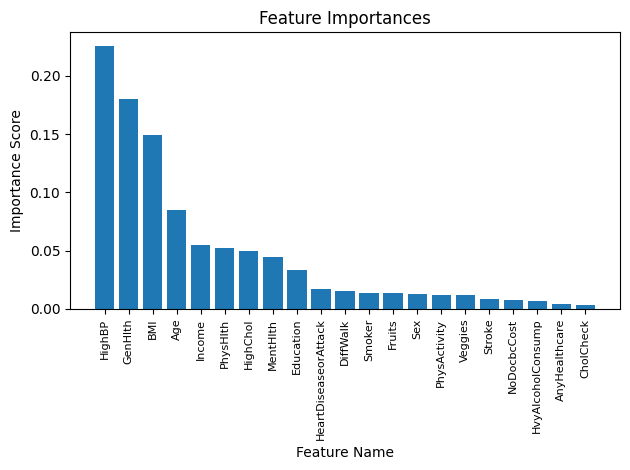

In [19]:
fnames = model4.feature_names_in_
importance = model4.feature_importances_
dfdata = pd.DataFrame({'feature': fnames, 'importance': importance})
sorted = dfdata.sort_values(by='importance',ascending=False)


plt.title("Feature Importances")
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.bar(sorted['feature'],sorted['importance'])
plt.xticks(rotation=90,size=8)
plt.tight_layout()

The most important variables with original dataset were:
- HighBP
- GenHlth
- BMI
- Age
- Income
- PhysHlth
- HighChol
- MentHlth
- Education

It is interesting that the model with original dataset with Income and PhysHlth ranked as high importance performs similarly to the model with Income and PhysHlth variables removed.

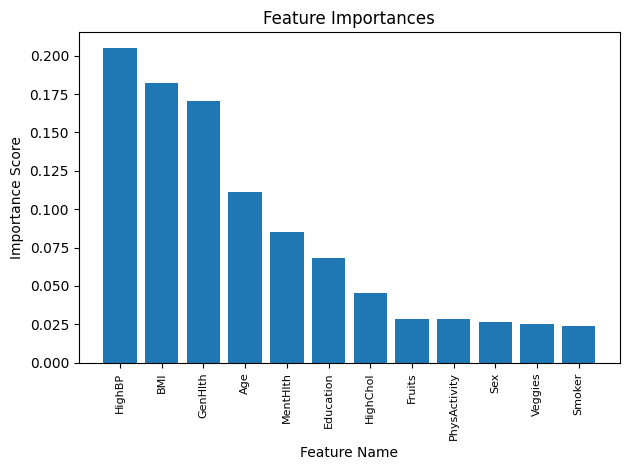

In [20]:
# investigating important features in preprocessed dataset
fnames = model46.feature_names_in_
importance = model46.feature_importances_
dfdata = pd.DataFrame({'feature': fnames, 'importance': importance})
sorted = dfdata.sort_values(by='importance',ascending=False)


plt.title("Feature Importances")
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.bar(sorted['feature'],sorted['importance'])
plt.xticks(rotation=90,size=8)
plt.tight_layout()

The most important variables here were:
- HighBP
- BMI
- GenHlth
- Age
- MentHlth
- Education
- HighChol

The following important variables lack the removed variables that were rated as high importance from the original dataset, however the removed variables seem to provide 0.6% increase in performance, which is not highly significant.

<h3>Testing What Variables Random Forest Would Select</h3>

In [21]:
from sklearn.ensemble import RandomForestClassifier

def imp_features(iv_train, iv_test, dv_train, dv_test):
    rf = RandomForestClassifier(n_estimators = 500, random_state = 42)
    rf_f=rf.fit(iv_train, dv_train)
    return rf_f

In [22]:
#original dataset

rf_original_if= imp_features(train_Ivs1, test_Ivs1, train_DV1, test_DV1)
fnames1=rf_original_if.feature_names_in_
importance1 =rf_original_if.feature_importances_

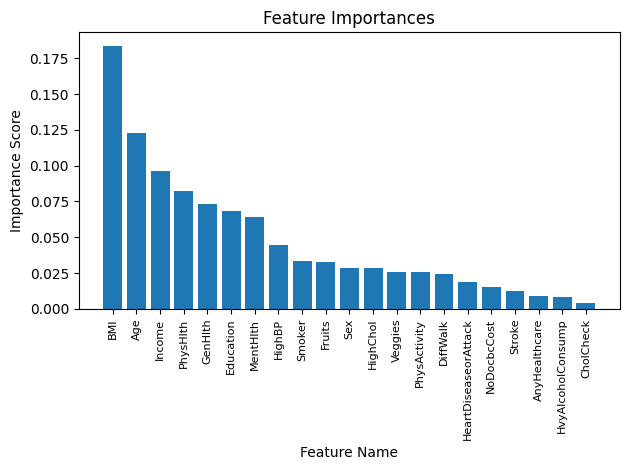

In [23]:
#visualizing

dfdata = pd.DataFrame({'feature': fnames1, 'importance': importance1})
sorted = dfdata.sort_values(by='importance',ascending=False)

plt.title("Feature Importances")
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.bar(sorted['feature'],sorted['importance'])
plt.xticks(rotation=90,size=8)
plt.tight_layout()

The most important variables here were:
- BMI
- Age
- Income
- PhysHlth
- GenHlth
- Education
- MentHlth
- HighBP

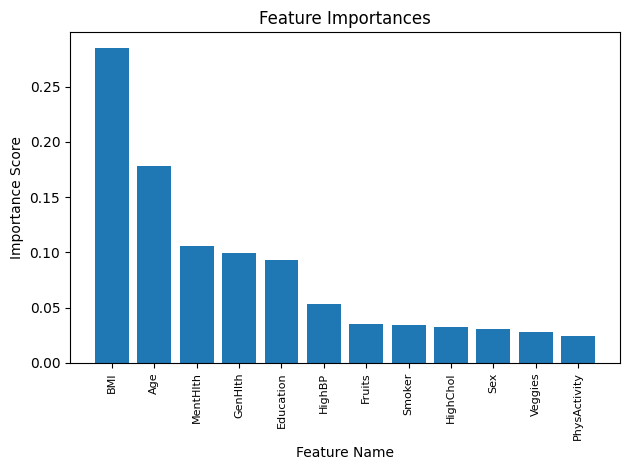

In [24]:
# preprocessed dataset

rf_original_if6= imp_features(train_Ivs6, test_Ivs6, train_DV6, test_DV6)
fnames6=rf_original_if6.feature_names_in_
importance6=rf_original_if6.feature_importances_

#visualizing

dfdata = pd.DataFrame({'feature': fnames6, 'importance': importance6})
sorted = dfdata.sort_values(by='importance',ascending=False)

plt.title("Feature Importances")
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.bar(sorted['feature'],sorted['importance'])
plt.xticks(rotation=90,size=8)
plt.tight_layout()

The most important variables here were:
- BMI
- Age
- MentHlth
- GenHlth
- Education
- HighBP

The final importance scores with pre-processed data have chosen variables mentioned the most in the above evaluation, therefore, these variables will be used for the modelling part.

In [25]:
diabetes_important=data_min_diffwalk_phys_nzv[['Diabetes_binary','BMI','Age','MentHlth','GenHlth','Education','HighBP']]

diabetes_important.to_csv('diabetes_important.csv',index=False)